# Table of Contents
>## 1. Overfitting in classification
* 1.1. Overfitting in Linear Binary Logistic Classification
* 1.2. Overfitting in Non-linear Binary Logistic Classification
* 1.3. Summary
* 1.4. Questions

In [1]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
from helper_functions import *

# set things like fonts etc - comes from helper_functions
set_notebook_preferences()

# add a show/hide code button - also from helper_functions
toggle_code(title = "setup code")

# 1. Overfitting in classification

## 1.1. Overfitting in Linear Binary Logistic Classification
* Data: 2D Iris dataset - 75% train + 25% test

* **Dataset**:

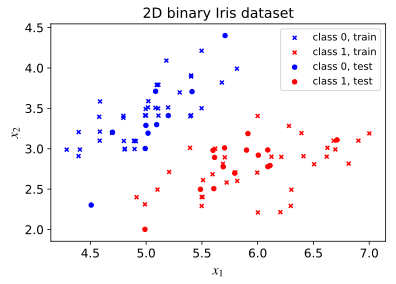

In [2]:
x = np.load('iris_inputs_full.npy')
y = np.load('iris_labels.npy')

x = x[np.where(np.logical_not(y == 2))[0]] 
y = y[np.where(np.logical_not(y == 2))[0]] # removing the datapoints of class 2

x = x[:,0:2] 

ax = plt.subplot(1,1,1)
no_test = (x.shape[0]*1)//4
x_test, x_train, y_test, y_train = x[:no_test], x[no_test:], y[:no_test], y[no_test:]

class_0_train, class_1_train = np.where(y_train == 0), np.where(y_train == 1)
plt.scatter(x_train[class_0_train, 0], x_train[class_0_train, 1], color = 'blue', marker = 'x', s = 15,label='class 0, train')
plt.scatter(x_train[class_1_train, 0], x_train[class_1_train, 1], color = 'red', marker = 'x', s = 15,label='class 1, train')

class_0_test, class_1_test = np.where(y_test == 0), np.where(y_test == 1)


plt.scatter(x_test[class_0_test, 0], x_test[class_0_test, 1], color = 'blue', marker = 'o', s = 20,label='class 0, test')
plt.scatter(x_test[class_1_test, 0], x_test[class_1_test, 1], color = 'red', marker = 'o', s =20,label='class 1, test')
ax.legend()
beautify_plot({"title":r"2D binary Iris dataset", "x":"$x_1$", "y":"$x_2$"})
plt.show()


toggle_code(title = "2D Iris Dataset", on_load_hide = True)

* **MLE fitting result**:

In [3]:
def sig(x):
    
    return 1/(1 + np.exp(-x)) # define logistic function for convenience

def gradient_ascent(x, y, x_test, y_test, init_weights, no_steps, stepsize): # x: train inputs, y: train labels, rest self explanatory
    
    x = np.append(np.ones(shape = (x.shape[0], 1)), x, axis = 1) # add 1's to the inputs as usual
    x_test = np.append(np.ones(shape = (x_test.shape[0], 1)), x_test, axis = 1) # add 1's to the inputs as usual
    
    w = init_weights.copy() # copy weights (to prevent changing init_weights as a side-effect - don't dwell on this)
    
    w_history, log_liks, log_liks_test = [],[],[] # arrays for storing weights and log-liklihoods at each step
    
    for n in range(no_steps): # in this part we optimise log-lik w.r.t. w
        
        log_liks.append(np.sum(y * np.log(sig(x.dot(w))) + (1 - y) * np.log(1 - sig(x.dot(w))))) # record current log-lik
        log_liks_test.append(np.sum(y_test * np.log(sig(x_test.dot(w))) + (1 - y_test) * np.log(1 - sig(x_test.dot(w))))) # record current log-lik

        w_history.append(w.copy()) # record current weights (use w.copy() to prevent aliasing - don't dwell on this)
    
        sigs = sig(x.dot(w)) # using our neat convenience function
        
        dL_dw = np.mean((y - sigs)*x.T, axis = 1) # calculate gradient of log-likelihood w.r.t. w
        
        w += stepsize * dL_dw # update weights and repeat
    
    return np.array(w_history), np.array(log_liks), np.array(log_liks_test)

toggle_code(title = "Logistic and gradient ascent function", on_load_hide = True)



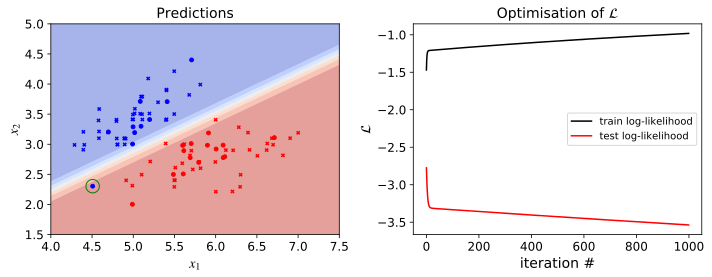

Final training log-likelihood = -0.98 nats
Final test log-likelihood = -3.54 nats


In [4]:
w_init = [-4,7,-11]  # use a good initialisation to speed up simulation: 
                      # there is a unique optimum, so poorer initialisations will just entail waiting for longer

w_history, log_liks_train, log_liks_test = gradient_ascent(x_train, y_train, x_test, y_test, w_init, 1000, 0.5)

x1 = np.linspace(4, 7.5, 100)
x2 = np.linspace(1.5, 5, 100)

test_grid = np.stack(np.meshgrid(x1, x2), axis = 2).reshape((-1, 2))

test_grid = np.append(np.ones(shape = (test_grid.shape[0], 1)), test_grid, axis = 1)

pred = sig(test_grid.dot(w_history[-1])).reshape(100, 100)


fig=plt.figure(figsize=(10, 4), dpi= 80)


plt.subplot(1,2,1)
plt.contourf(x1, x2,pred, cmap = 'coolwarm', alpha = 0.5, origin = 'lower')
plt.scatter(x_train[class_0_train, 0], x_train[class_0_train, 1], color = 'blue', marker = 'x', s = 10)
plt.scatter(x_train[class_1_train, 0], x_train[class_1_train, 1], color = 'red', marker = 'x', s = 10)

plt.scatter(x_test[class_0_test, 0], x_test[class_0_test, 1], color = 'blue', marker = 'o', s = 15)
plt.scatter(x_test[class_1_test, 0], x_test[class_1_test, 1], color = 'red', marker = 'o', s = 15)
beautify_plot({"title":r"Predictions", "x":"$x_1$", "y":"$x_2$"})
plt.scatter([4.50747563], [2.30301912], color = 'green', marker = 'o', s = 180,facecolors='none')


ax2 = plt.subplot(1,2,2)
plt.plot(log_liks_train, color = 'black',label='train log-likelihood')
plt.plot(log_liks_test, color = 'red',label='test log-likelihood')
beautify_plot({"title":r"Optimisation of $\mathcal{L}$", "x":"iteration #", "y":"$\mathcal{L}$"})
ax2.legend()

fig.tight_layout()
plt.show()

x = np.arange(10)

print("Final training log-likelihood = {0:.2f} nats".format(log_liks_train[-1]))
print("Final test log-likelihood = {0:.2f} nats".format(log_liks_test[-1]))


toggle_code(title = "2D overfitting example", on_load_hide = True)



* **Discussion**:

>* The data is **linearly separable** $\;\;\Rightarrow\;\;$ there are a set of ML solutions
>* Each solution places the linear decision boundary & makes it **as steep as possible** (step fn.)
>* The probability of each datapoint $\rightarrow 1$ $\;\;\Rightarrow\;\;$ Training LL $\rightarrow 1$
>* Accordingly, the magnitude of the weights $\rightarrow \infty$
>* If there is a mis-classified test data point $\;\;\Rightarrow\;\;$ Test LL $\rightarrow 0$
>* $\therefore$ The model is overfitted (it's overconfident)



## 1.2. Overfitting in Non-linear Binary Logistic Classification
* **Dataset**:

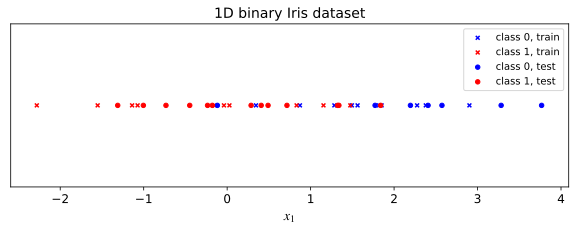

In [5]:
x = np.load('class_1d_inputs.npy')
y = np.load('class_1d_labels.npy')

x_train, x_test, y_train, y_test = x[:20], x[20:], y[:20], y[20:]

class_0_train, class_1_train = np.where(y_train == 0), np.where(y_train == 1)

fig=plt.figure(figsize=(10, 3), dpi= 80)
ax = plt.subplot(1,1,1)

plt.scatter(x_train[class_0_train,0], np.ones((1,np.size(class_0_train))), color = 'blue', marker = 'x', s = 15,label='class 0, train')
plt.scatter(x_train[class_1_train, 0], np.ones((1,np.size(class_1_train))), color = 'red', marker = 'x', s = 15,label='class 1, train')

class_0_test, class_1_test = np.where(y_test == 0), np.where(y_test == 1)


plt.scatter(x_test[class_0_test, 0], np.ones((1,np.size(class_0_test))), color = 'blue', marker = 'o', s = 20,label='class 0, test')
plt.scatter(x_test[class_1_test, 0], np.ones((1,np.size(class_1_test))), color = 'red', marker = 'o', s =20,label='class 1, test')
ax.legend()
ax.get_yaxis().set_ticks([])

beautify_plot({"title":r"1D binary Iris dataset", "x":"$x_1$"})
plt.show()

toggle_code(title = "1D Iris Dataset", on_load_hide = True)

* **Model: 100 Gausian basis fn.s**
>$$\phi_{d}(x) = \exp(-\frac{1}{2 l^2} ( \mathbf{x} - \mu_{d})^2)$$
>$$$$
>* Length-scale: range from $l=0.1$ to $l=3$

* **MLE fitting result**:

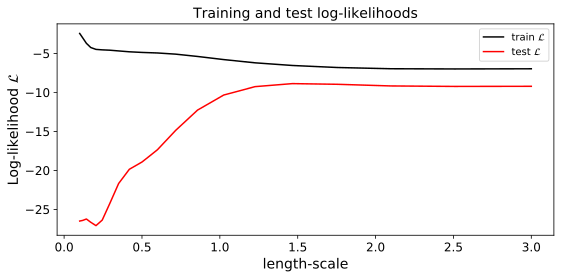

In [6]:
no_lengthscales = 20
lengthscales = np.logspace(np.log10(3),np.log10(0.1),no_lengthscales)
no_basis = 100
mu = np.linspace(-2.5, 4.0, no_basis)

N_train = y_train.size
N_test = y_test.size
ll_test = np.zeros((no_lengthscales,1))
ll_train = np.zeros((no_lengthscales,1))                   


for l in range(no_lengthscales):
        
    lengthscale = lengthscales[l]
    phi_train = np.zeros((N_train,no_basis))
    phi_test = np.zeros((N_test,no_basis))

    for n in range(N_train):
        for d in range(no_basis):   
            phi_train[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - x_train[n])**2)

    for n in range(N_test):
        for d in range(no_basis):   
            phi_test[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - x_test[n])**2)

    w_init = np.zeros(shape = (no_basis + 1,))
     
    w_history, log_liks_train, log_liks_test = gradient_ascent(phi_train, y_train, phi_test, y_test, w_init, 5000, 0.1)

    ll_test[l] = log_liks_test[-1]
    ll_train[l] = log_liks_train[-1]
                    
plt.figure(figsize = (8, 4))
plt.subplot(1, 1, 1)
plt.plot(lengthscales,ll_train, color = 'black',label='train $\mathcal{L}$') # plot train log likelihoods\
plt.plot(lengthscales,ll_test, color = 'red',label='test $\mathcal{L}$') # plot test log likelihoods
beautify_plot({"title":r"Training and test log-likelihoods", "x":"length-scale", "y":"Log-likelihood $\mathcal{L}$"})
plt.gca().legend()
plt.tight_layout()
plt.show()
toggle_code(title = "Test and train log-likelihoods on the 1D Iris Dataset", on_load_hide = True)



* **Observation**:

>* For small $l$: training LL is at its highest
>* For small $l$: test LL is at its lowest

* **Large length-scale ($l\approx 1.5$)**:

>* Reasonable fit / takes into account the indistinct boundary between the two classes
>* Plot for larger length-scale: similar but over-smoothed boundary which reduces the test likelihood

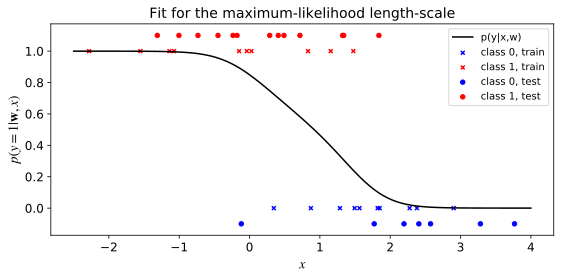

Final training log-likelihood = -6.58 nats
Final test log-likelihood = -8.86 nats


In [7]:
lengthscale = 1.5
no_basis = 100

mu = np.linspace(-2.5, 4.0, no_basis)

N_train = y_train.size
N_test = y_test.size

phi_train = np.zeros((N_train,no_basis))
phi_test = np.zeros((N_test,no_basis))

for n in range(N_train):
    for d in range(no_basis):   
        phi_train[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - x_train[n])**2)

for n in range(N_test):
    for d in range(no_basis):   
        phi_test[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - x_test[n])**2)

w_init = np.zeros(shape = (no_basis + 1,))
     
w_history, log_liks_train, log_liks_test = gradient_ascent(phi_train, y_train, phi_test, y_test, w_init, 5000, 0.1)

plt.figure(figsize = (8, 4))

plt.subplot(1, 1, 1)
N_eval = 100;
xs = np.linspace(mu[0],mu[-1],N_eval)

phi_eval = np.zeros((N_eval,no_basis))
for n in range(N_eval):
    for d in range(no_basis):   
        phi_eval[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - xs[n])**2)

phi_eval = np.append(np.ones(shape = (phi_eval.shape[0], 1)), phi_eval, axis = 1) # add 1's to the inputs as usual

plt.scatter(x_train[class_0_train,0], 0*np.ones((1,np.size(class_0_train))), color = 'blue', marker = 'x', s = 15,label='class 0, train')
plt.scatter(x_train[class_1_train, 0], 1*np.ones((1,np.size(class_1_train))), color = 'red', marker = 'x', s = 15,label='class 1, train')


plt.plot(xs, sig(phi_eval.dot(w_history[-1,:])), color = 'black', zorder = 3, label = 'p(y|x,w)')
plt.scatter(x_test[class_0_test, 0], -0.1*np.ones((1,np.size(class_0_test))), color = 'blue', marker = 'o', s = 20,label='class 0, test')
plt.scatter(x_test[class_1_test, 0], 1.1*np.ones((1,np.size(class_1_test))), color = 'red', marker = 'o', s =20,label='class 1, test')

beautify_plot({"title":r"Fit for the maximum-likelihood length-scale", "x":"$x$", "y":"$p(y = 1|\mathbf{w}, x)$"})
plt.gca().legend()
plt.tight_layout()
plt.show()

print("Final training log-likelihood = {0:.2f} nats".format(log_liks_train[-1]))
print("Final test log-likelihood = {0:.2f} nats".format(log_liks_test[-1]))

toggle_code(title = "Maximum likelihood length-scale", on_load_hide = True)



* **Small length-scale ($l\approx 1.5$)**:

>* The model is contorting itself so that it assigns a probability close to $1$ for every training point
>* This is because the length-scale of the basis fn. is very short $\rightarrow$ **failure of MLE**

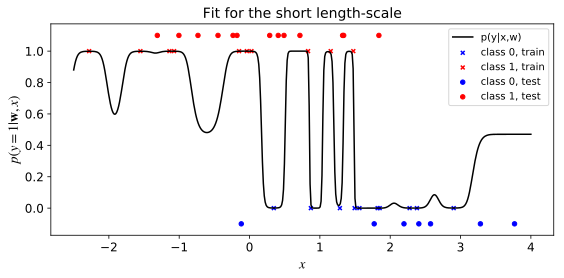

Final training log-likelihood = -0.44 nats
Final test log-likelihood = -37.61 nats


In [8]:
lengthscale = 0.1 # you may need to alter the learning rate and the number of iterations if you change this value 
no_basis = 100

mu = np.linspace(-2.5, 4.0, no_basis)

N_train = y_train.size
N_test = y_test.size

phi_train = np.zeros((N_train,no_basis))
phi_test = np.zeros((N_test,no_basis))

for n in range(N_train):
    for d in range(no_basis):   
        phi_train[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - x_train[n])**2)

for n in range(N_test):
    for d in range(no_basis):   
        phi_test[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - x_test[n])**2)

w_init = np.zeros(shape = (no_basis + 1,))
     
w_history, log_liks_train, log_liks_test = gradient_ascent(phi_train, y_train, phi_test, y_test, w_init, 5000, 2)

plt.figure(figsize = (8, 4))

plt.subplot(1, 1, 1)
N_eval = 500;
xs = np.linspace(mu[0],mu[-1],N_eval)

phi_eval = np.zeros((N_eval,no_basis))
for n in range(N_eval):
    for d in range(no_basis):   
        phi_eval[n,d] = np.exp(-1/(2*lengthscale**2)*(mu[d] - xs[n])**2)

phi_eval = np.append(np.ones(shape = (phi_eval.shape[0], 1)), phi_eval, axis = 1) # add 1's to the inputs as usual

plt.scatter(x_train[class_0_train,0], 0*np.ones((1,np.size(class_0_train))), color = 'blue', marker = 'x', s = 15,label='class 0, train')
plt.scatter(x_train[class_1_train, 0], 1*np.ones((1,np.size(class_1_train))), color = 'red', marker = 'x', s = 15,label='class 1, train')


plt.plot(xs, sig(phi_eval.dot(w_history[-1,:])), color = 'black', zorder = 3, label = 'p(y|x,w)')
plt.scatter(x_test[class_0_test, 0], -0.1*np.ones((1,np.size(class_0_test))), color = 'blue', marker = 'o', s = 20,label='class 0, test')
plt.scatter(x_test[class_1_test, 0], 1.1*np.ones((1,np.size(class_1_test))), color = 'red', marker = 'o', s =20,label='class 1, test')

beautify_plot({"title":r"Fit for the short length-scale", "x":"$x$", "y":"$p(y = 1|\mathbf{w}, x)$"})
plt.gca().legend()
plt.tight_layout()
plt.show()

print("Final training log-likelihood = {0:.2f} nats".format(log_liks_train[-1]))
print("Final test log-likelihood = {0:.2f} nats".format(log_liks_test[-1]))

toggle_code(title = "Short length-scale", on_load_hide = True)

## 1.3. Summary

Overfitting occurs when the model can contort itself to assign probability $1$ to every training data point $\rightarrow$ unnecessarily confident predictions which are not compatible with test data

**Linear classification methods trained by maximising the training L** will overfit in cases where the training data classes are perfectly separable by a linear decision boundary

**Non-linear logistic classification with RBF basis functions trained by maximising the training L** will overfit when a large number of basis functions are used and the length-scales are short

## 1.4. Questions

* **Q1. Extrapolation in radial basis function logistic classification**

Consider the second example above where radial basis functions $\phi_{d}(x) = \exp(-\frac{1}{2 l^2} ( \mathbf{x} - \mu_{d})^2)$ with length-scale $l$ were used for non-linear logisitic classification. A test point lies five length-scales away from its closest training point. 

a) Estimate the prediction at this point $p(y_n^{\ast} = 1 | \mathbf{w},x_n^{\ast})$. 

b) Would this estimate change if a basis-functions were placed in this region? 

c) What implications does this have for the ability of this model to generalise away from the training data?

You can, of course, alter the code if this helps to answer these questions.

<details>
<summary>Answer</summary>
<div>
a) Let's consider the situation where the basis functions are only located in the region of the training data. After 5 length-scales the closest radial basis function to the test point has fallen to $\exp(-25/2) \approx 5 \times 10^{-6}$ and so the training data provide essentially no useful information about this region of input space and the prediction is $p(y_n^{\ast} = 1 | \mathbf{w},x_n^{\ast}) \approx 1/2$. <br><br>

b) Even if basis functions are placed around the the test point, since each training datapoint only provides information about the weights on radial basis functions that are 'close' to them, the weights of RBFs around the test datapoint will remain at whatever value they are initialised at: the predictions at the training data are not affected by their value.<br><br>

c) Models that employ radial basis functions can only generalise one or two length-scales outside the region of the training data. You can think of these models as simply smoothing the data. This observation is the motivation for considering richer classes of basis function that can be learned from data. Neural networks can be viewed through this lens. 


</div>
</details>
